<a href="https://colab.research.google.com/github/monjjjjj/MNIST/blob/main/MNIST1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 增加Dropout練習

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.models import Sequential
from keras.layers  import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from keras import optimizers, regularizers
from keras.utils import np_utils
from keras.datasets import mnist



In [4]:
#Read data 
#Training data = 60000, Testing data = 10000
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
#Normalization
x_train = x_train.reshape(60000,1,28,28)
x_train = x_train.astype('float32')  
x_train /= 255.0
x_test = x_test.reshape(10000,1,28,28)
x_test = x_test.astype('float32')
x_test /= 255.0


#One-hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print(x_train.shape)


(60000, 1, 28, 28)


In [6]:
#Build Model
def build_model():
  model = Sequential()
  model.add(Conv2D(32,5,input_shape=(1,28,28),activation='sigmoid',padding='same'))
  model.add(MaxPooling2D(2,data_format='channels_first'))
  model.add(BatchNormalization())

  model.add(Conv2D(64,5,activation='sigmoid',padding='same'))
  model.add(MaxPooling2D(2,data_format='channels_first'))
  
  model.add(Flatten())
  model.add(Dropout(0.2))
  model.add(Dense(512,activation='relu'))
  model.add(Dense(10,activation='softmax'))
  
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
  
  print(model.summary())
  keras.utils.plot_model(model, show_shapes=True, dpi=64, to_file='model2.png')

  return model

In [7]:
#training
model = build_model()

train_history = model.fit(x=x_train,y=y_train,validation_split=0.2,batch_size=200,epochs=20,verbose=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1, 28, 32)         22432     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 1, 14, 16)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 1, 14, 16)        64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 1, 14, 64)         25664     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 7, 32)         0         
 2D)                                                             
                                                        

In [8]:
print(train_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [9]:
def show_train_history(train_history,train,validation):
  
  if train == 'accuracy':
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
  else:
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Model Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')

  plt.legend(['train','validation'],loc='upper left')
  plt.show()

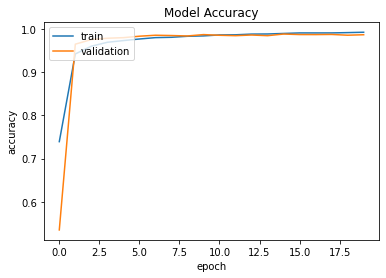

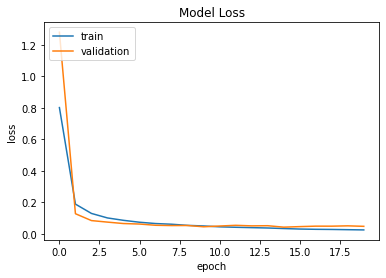

In [10]:
show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')

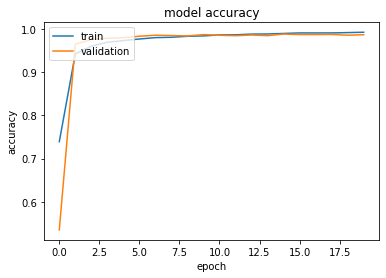

In [11]:
# summarize history for accuracy
plt.plot(train_history.history['accuracy'])
plt.plot(train_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left') 
plt.show()

In [12]:
#testing
scores=model.evaluate(x_test,y_test)
print()
print('accuracy:',scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0372 - accuracy: 0.9872

accuracy: 0.9872000217437744
